<a href="https://colab.research.google.com/github/palia95/ML_Physics/blob/master/Fitline_Ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import pylab as pl
%pylab inline

# I have created a stylesheet to define default plot behaviors. 
#This stylesheet changes the default parameters stored in the ictionary matplitlib.rcParams
pl.style.use("https://raw.githubusercontent.com/fedhere/MLPNS2021/master/fbb.mplstyle")
pl.rcParams['font.size'] = 20

Populating the interactive namespace from numpy and matplotlib


In [12]:
grbAG = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLPNS2021/main/HW3_LinearRegression/grb050525A.csv")
grbAG.head()

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0


In [14]:
grbAG["logtime"] = np.log10(grbAG["time"])
grbAG

,filter,time,mag,magerr,upperlimit,logtime
0,V,66,13.21,0.24,0,1.819544
1,V,67,12.90,0.23,0,1.826075
2,V,68,12.86,0.23,0,1.832509
3,V,69,13.01,0.23,0,1.838849
4,V,70,12.97,0.23,0,1.845098
...,...,...,...,...,...,...
114,W1,63738,NaN,21.20,1,4.804398
115,M2,74798,NaN,21.59,1,4.873890
116,U,128928,NaN,20.05,1,5.110347
117,V,971360,NaN,22.09,1,5.987380


(array([0.        , 2.51199984]), 8.582668233648771)

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


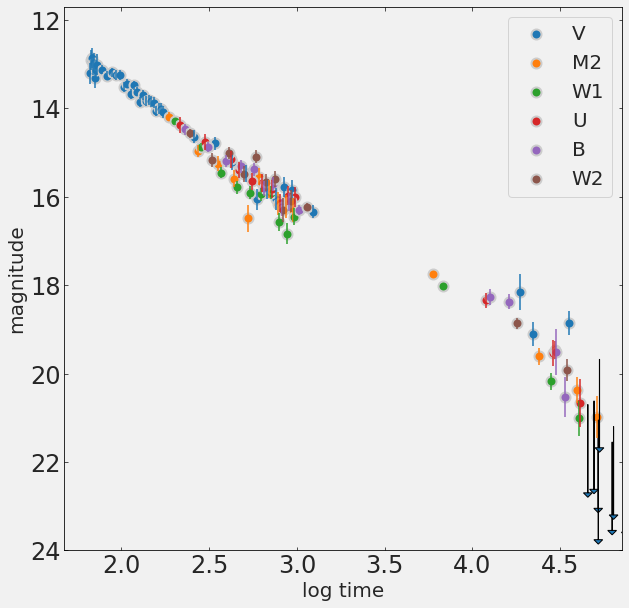

In [15]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)
    
#loop on every filter to plot - this will give differnt colors naturally. 
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"], 
                grbAG.loc[grbAG["filter"] == f, "mag"], 
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"], fmt='.', ms=0,
                fcolor=None, label=None)
    
# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"], 
               grbAG.loc[grbAG["filter"] == f, "mag"], 
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')
    

# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].logtime, 
             grbAG.loc[i].magerr, 0, 2, 
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)          
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = np.c_[np.ones((len(grbAG) - 
	grbAG.upperlimit.sum(), 1)), 
	grbAG[grbAG.upperlimit == 0].logtime]
y = grbAG.loc[grbAG.upperlimit == 0].mag
lr.fit(X, y)
lr.coef_, lr.intercept_

In [21]:
X = np.c_[np.ones((len(grbAG) - grbAG.upperlimit.sum(), 1)), 
	grbAG[grbAG.upperlimit == 0].logtime]
y = grbAG.loc[grbAG.upperlimit == 0].mag

theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta_best, X, y

(array([8.58266823, 2.51199984]), array([[1.        , 1.81954394],
        [1.        , 1.8260748 ],
        [1.        , 1.83250891],
        [1.        , 1.83884909],
        [1.        , 1.84509804],
        [1.        , 1.85125835],
        [1.        , 1.8573325 ],
        [1.        , 1.86332286],
        [1.        , 1.8920946 ],
        [1.        , 1.91907809],
        [1.        , 1.94448267],
        [1.        , 1.96848295],
        [1.        , 1.99122608],
        [1.        , 2.01283722],
        [1.        , 2.03342376],
        [1.        , 2.05307844],
        [1.        , 2.07188201],
        [1.        , 2.08990511],
        [1.        , 2.10720997],
        [1.        , 2.12385164],
        [1.        , 2.13987909],
        [1.        , 2.15533604],
        [1.        , 2.17026172],
        [1.        , 2.18469143],
        [1.        , 2.19865709],
        [1.        , 2.2121876 ],
        [1.        , 2.22530928],
        [1.        , 2.2380461 ],
        [1.    

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = np.c_[np.ones((len(grbAG) - 
	grbAG.upperlimit.sum(), 1)), 
	grbAG[grbAG.upperlimit == 0].logtime]
y = grbAG.loc[grbAG.upperlimit == 0].mag
lr.fit(X, y)
lr.coef_, lr.intercept_

(array([0.        , 2.51199984]), 8.582668233648771)

In [23]:
#note: imports should be moved to the top cell - follow PEP8 guidelines
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X, y)
print ("best fit parameters from the sklearn LinearRegression(): " + 
       "intercept {:.2f}, slope {:.2f}".format(lr.intercept_, lr.coef_[1]))

best fit parameters from the sklearn LinearRegression(): intercept 8.58, slope 2.51


In [39]:
#note: imports should be moved to the top cell - follow PEP8 guidelines
from scipy.optimize import minimize

def line(x, intercept, slope):
    return slope * x + intercept

def l1(args, x, y):
    a, b = args
    return sum(abs(line(x, b, a) - y))

def l2(args, x, y):
    a, b = args
    return sum((line(x, b, a) - y)**2)

	
x = grbAG[grbAG.upperlimit == 0].logtime.values
y = grbAG.loc[grbAG.upperlimit == 0].mag.values

initialGuess = (10, 1)

l1Solution = minimize(l1, initialGuess, args=(x, y))
print(l1Solution)
print("")
print("best fit parameters from the minimization of L1: " + 
       "slope {:.2f}, intercept {:.2f}".format(*l1Solution.x))

      fun: 26.303691403868047
 hess_inv: array([[ 9.24535720e-05, -1.93740490e-04],
       [-1.93740490e-04,  1.19320831e-03]])
      jac: array([1.61817122, 0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 500
      nit: 12
     njev: 122
   status: 2
  success: False
        x: array([2.64056468, 8.22612169])

best fit parameters from the minimization of L1: slope 2.64, intercept 8.23


In [40]:
l2Solution = minimize(l2, initialGuess, args=(x, y))
print(l2Solution)
print("")
print("best fit parameters from the minimization of L2: " + 
       "slope {:.2f}, intercept {:.2f}".format(*l2Solution.x))

      fun: 12.825987500725471
 hess_inv: array([[ 0.00711354, -0.02029726],
       [-0.02029726,  0.06254437]])
      jac: array([8.34465027e-07, 1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([2.51199977, 8.58266841])

best fit parameters from the minimization of L2: slope 2.51, intercept 8.58


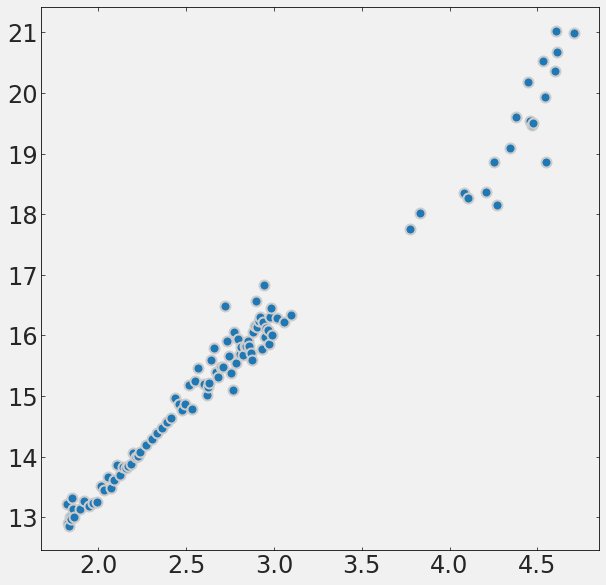

In [38]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)
    
#loop on every filter to plot - this will give differnt colors naturally. 
#Use pl.errorbar to plot the uncertainties


    
# replot to add a better marker (optional)

pl.scatter(x,y, 
    alpha=1, s=100, linewidth=2,
    label=f,
    edgecolor='#cccccc')

In [42]:
def chi2(args, x, y, s):
   a, b = args
   return sum((line(x, b, a) - y)**2 / s)

	
x = grbAG[grbAG.upperlimit == 0].logtime.values
y = grbAG.loc[grbAG.upperlimit == 0].mag.values
s = grbAG.loc[grbAG.upperlimit == 0].magerr.values
initialGuess = (10, 1)

chi2Solution = minimize(chi2, initialGuess, args=(x, y, s))
print(chi2Solution)
print("")
print("best fit parameters from the minimization of the chi squared: " + 
       "slope {:.2f}, intercept {:.2f}".format(*chi2Solution.x))

      fun: 58.49837428948396
 hess_inv: array([[ 0.00139785, -0.00381294],
       [-0.00381294,  0.01113154]])
      jac: array([5.7220459e-06, 0.0000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([2.49968626, 8.58159555])

best fit parameters from the minimization of the chi squared: slope 2.50, intercept 8.58


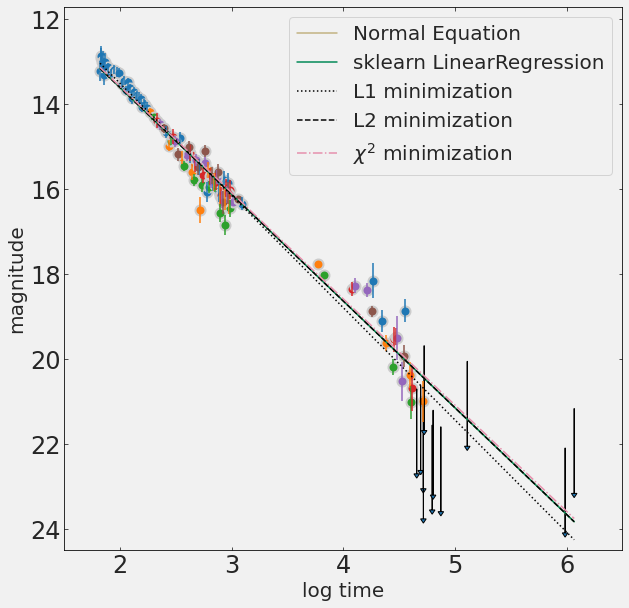

In [43]:
def plotline(pars, x, color='k', symbol='-', label='model', ax=ax):
    slope, intercept = pars
    y = line(x, intercept, slope)
    ax.plot(x, y, ls=symbol, c=color, label=label)


ax = pl.figure(figsize=(10,10)).add_subplot(111)

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"], 
                grbAG.loc[grbAG["filter"] == f, "mag"], 
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"], fmt='.', ms=0,
                fcolor=None, label=None)
    
# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"], 
               grbAG.loc[grbAG["filter"] == f, "mag"], 
               alpha=1, s=100, linewidth=2,
               edgecolor='#cccccc', label=None)
    

# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].logtime, 
             grbAG.loc[i].magerr, 0, 2, 
            head_width=0.05, head_length=0.1, ec='k')
    
#plotting models
#use Kelley colors for maximum readability
#https://gist.github.com/ollieglass/f6ddd781eeae1d24e391265432297538
colors = ['C2B280', '848482', '008856', 'E68FAC', '0067A5', 'F99379', 
          '604E97', 'F6A600', 'B3446C', 
          'DCD300', '882D17', '8DB600', '654522', 'E25822', '2B3D26',
          '222222', 'F3C300', '875692', 'F38400', 'A1CAF1', 'BE0032', ]
#normal equation
plotline((lr.coef_[1], lr.intercept_), grbAG.logtime.values, 
         color='#'+colors[0], 
         label="Normal Equation", ax=ax)
#sklearn
plotline((theta_best[::-1]), grbAG.logtime,  
         color='#'+colors[2], symbol='-',
         label="sklearn LinearRegression", ax=ax)
#minimize L1
plotline((l1Solution.x), grbAG.logtime,  
         symbol=':',
         label="L1 minimization", ax=ax)
#minimize L2
plotline((l2Solution.x), grbAG.logtime,  
         symbol='--',
         label="L2 minimization", ax=ax)
#minimize chi2
plotline((chi2Solution.x), grbAG.logtime, 
         color='#'+colors[3], symbol='-.',
         label=r"$\chi^2$ minimization", ax=ax)

pl.legend()

#with the LinearRegression object I can also do
#pl.plot(grbAG.logtime, lr.predict(np.c_[np.ones((len(grbAG), 1)), grbAG.logtime]), 'k-')

pl.ylim(24.5,11.7)
pl.xlim(1.5, 6.5)
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

In [44]:
!pip install emcee
import emcee

     |████████████████████████████████| 51kB 4.2MB/s 


In [ ]:
def log_prior(theta):
    a1, a2, Tb, b = theta

    if a1 > 0 and a2 > 0 and Tb > 0 and bTb > 1e2:
        return 0.0
    return -np.inf

def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)


def model (theta, x):
  [...]

def log_likelihood(theta, x, y, yerr):
    [...]